In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

df = pd.read_csv('classroom_actions.csv')

In [192]:
#create a new dataframe with all the control records
control_df = df.query('group =="control"')

#to get the click through rate, devide the number of completed users of control group by the total number of users in control dataframe
control_ctr = control_df.query('completed == True').count()[0] / control_df.shape[0]

#click through rate of control group
control_ctr

0.3719951923076923

In [193]:
#now repeat the same above steps for experiment group

#Create dataframe with all experiment records
experiment_df = df.query('group == "experiment"')

#Compute completion rate
experiment_ctr = experiment_df.query('completed == True').count()[0] / experiment_df.shape[0]
experiment_ctr

0.3935334872979215

In [109]:
#observed CTR differencen
obs_diff = experiment_ctr - control_ctr
obs_diff

0.02153829499022919

In [186]:
#crate a sampling distribution for the difference in mean
diffs = []
for _ in range(10000):
    b_sample = df.sample(df.shape[0], replace=True)
    control_df = b_sample.query('group =="control"')
    experiment_df = b_sample.query('group == "experiment"')
    control_ctr = control_df.query('completed == True').count()[0] / control_df.shape[0]
    experiment_ctr = experiment_df.query('completed == True').count()[0] / experiment_df.shape[0]
    diffs.append(experiment_ctr - control_ctr)

In [187]:
#convert to numpy array
diffs = np.array(diffs)

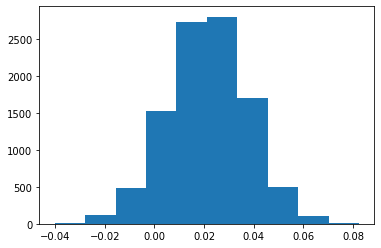

In [188]:
#plot distribution
plt.hist(diffs);

In [189]:
#create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

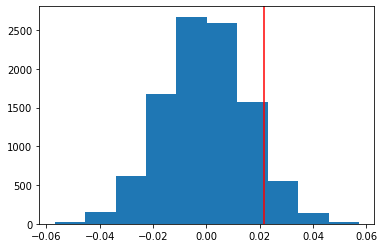

In [190]:
#plot null distribution
plt.hist(null_vals)

#plot line for observed statistic
plt.axvline(x=obs_diff, color='red')

In [191]:
#p value
(null_vals > obs_diff).mean()

0.0838

Do you have evidence, with a type I error rate of 0.05, that this course increases in completion rate when using the experimental description on its course overview page?

No